In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from keras.preprocessing.image import random_rotation, random_shift, random_zoom
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Activation, Dense, Dropout, Flatten
from keras.models import Model, Sequential, model_from_json
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import np_utils

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [5]:
pwd

'/content'

In [6]:
train_dir = '/content/drive/My Drive/Colab Notebooks/data_set/train'
val_dir = '/content/drive/My Drive/Colab Notebooks/data_set/val'
train_folder = os.listdir(train_dir)
print(train_folder)

dog_folder = '/content/drive/My Drive/Colab Notebooks/data_set/train/dog'
cat_folder = '/content/drive/My Drive/Colab Notebooks/data_set/train/cat'
dog_imgs = os.listdir(dog_folder)
cat_imgs = os.listdir(cat_folder)
print("Number of dog images:", len(dog_imgs))
print("Number of cat images:", len(cat_imgs))

n_train_imgs = len(dog_imgs + cat_imgs)
print("Number of train images:", n_train_imgs)

['dog', 'cat']
Number of dog images: 13
Number of cat images: 13
Number of train images: 26


In [0]:
# df = np.arange(12).reshape(3, 4)
# df, target = df[:, :3], df[:, -1]
# # def img_to_array_with_class(images):
# # array = np.zeros((none, w, h, ch))
# #   for img in images:
# #     save_img(path, x) #
# # return array
# temp_img_array_list.shape
# np.save(dir_name+'.npy', temp_img_array_list)

## ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
            #featurewise_center = False,
            #samplewise_center = False,
            #featurewise_std_normalization = False,
            #samplewise_std_normalization = False,
            #zca_whitening = False,
            rotation_range = 30, # ランダムに回転
            #vertical_flip = True, # ランダムに上下反転
            horizontal_flip = True, # ランダムに左右反転
            height_shift_range = 0.3, # 上下平行移動
            width_shift_range= 0.3, # 左右平行移動
            shear_range = 20, # ランダムにせん断
            zoom_range = [0.5,1], # ランダムに拡大縮小
            channel_shift_range = 5.0, # ランダムに画素値に値を足す
            #fill_mode = 'nearest',
            brightness_range=[0.5, 1.0], # ランダムに明度を変更
            rescale=1./255,
        )

### flow_from_directory

In [7]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # モデルの入力サイズ
    color_mode='rgb',  # 読み込み形式
    batch_size=1,  # バッチサイズ
    class_mode='binary'
    )

validation_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  # モデルの入力サイズ
    color_mode='rgb',  # 読み込み形式
    batch_size=1,  # バッチサイズ
    class_mode='binary'
    )


NameError: ignored

In [0]:
label_dict = train_generator.class_indices
label_dict

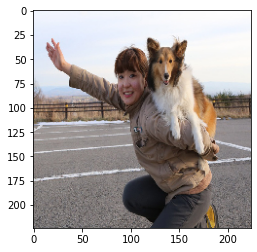

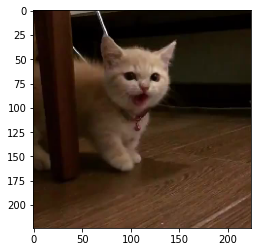

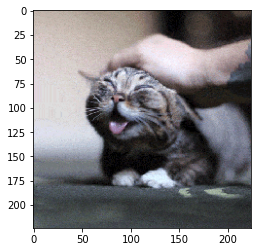

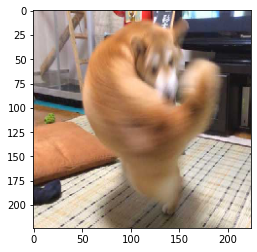

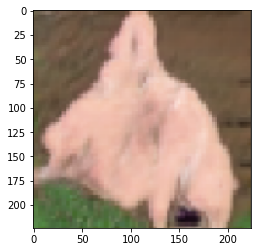

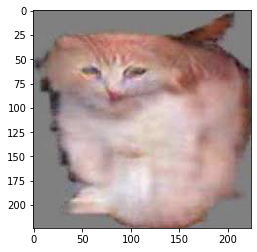

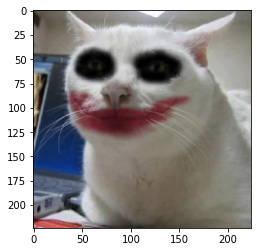

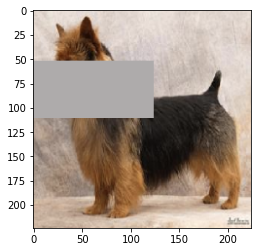

In [59]:
#入力画像サイズの指示
img_size = (224,224)
#画像フォルダ名の指示
dir_name = 'test'
#画像拡張子の指示
file_type  = 'jpg'

#フォルダ内のファイルパスをリスト化
img_list = glob.glob('./' + dir_name + '/*.' + file_type)
#保存先の配列を確保
temp_img_array_list = []

#ファイルパスのリストをもとに画像を配列化
for img in img_list:
    #画像を224x224にリサイズしPIL形式で読込
    temp_img = load_img(img,grayscale=False,target_size=(img_size))
    #PIL形式からNumpy配列に変換と正規化(224, 224, 3)
    temp_img_array = img_to_array(temp_img) /255
    #変換したNumpy配列を末尾に追加
    temp_img_array_list.append(temp_img_array)
#Numpy配列をリスト化(*, 244, 224, 3)
test = np.array(temp_img_array_list)

for img in test:
  pil_img = Image.fromarray(np.uint8(img*255))
  fig = plt.figure()
  plt.imshow(pil_img)
plt.show()

test_label = [1, 0, 0, 1, 1, 0, 0, 1]

In [60]:
model = Sequential()
model.add(Conv2D(32, 3, 3, input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
activation_10 (Activation)   (None, 109, 109, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 186624)           

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(224, 224,...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  


## Model Fit

In [91]:
model.fit_generator(
        train_generator,
        steps_per_epoch = n_train_imgs*4,
        epochs=6,
        validation_data = validation_generator
        )

Epoch 1/6
104/104 [==============================] - 25s 245ms/step - loss: 0.6758 - acc: 0.5962 - val_loss: 0.7562 - val_acc: 0.5000
Epoch 2/6
104/104 [==============================] - 26s 246ms/step - loss: 0.6785 - acc: 0.5865 - val_loss: 0.7058 - val_acc: 0.5000
Epoch 3/6
104/104 [==============================] - 26s 249ms/step - loss: 0.6427 - acc: 0.4904 - val_loss: 0.7140 - val_acc: 0.5000
Epoch 4/6
104/104 [==============================] - 26s 248ms/step - loss: 0.6914 - acc: 0.5865 - val_loss: 0.6481 - val_acc: 0.8000
Epoch 5/6
104/104 [==============================] - 26s 248ms/step - loss: 0.6673 - acc: 0.6154 - val_loss: 0.6560 - val_acc: 0.8000
Epoch 6/6
104/104 [==============================] - 26s 247ms/step - loss: 0.6584 - acc: 0.5481 - val_loss: 0.7073 - val_acc: 0.4000


## Model Predict

In [92]:
preds = model.predict(test).reshape(-1, )
print(preds)
# 二値分類
pred_list = np.round(preds).reshape(-1, )
pred_label_list = []
for pred in preds:
  if pred > 0.5:
    pred_label_list.append('cat')
  else:
    pred_label_list.append('dog')
print('pred', pred_list)
print('test', test_label)
#多クラス分類
# pred_list = np.argmax(preds, 1)

# keys = [k for preds in pred_list for k, v in label_dict.items() if v == pred_list[pred]]
# print(keys)


print(accuracy_score(test_label, pred_list))


[0.5119027  0.00538859 0.45581442 0.22724399 0.5361533  0.5355692
 0.47920993 0.45973447]
pred [1. 0. 0. 0. 1. 1. 0. 0.]
test [1, 0, 0, 1, 1, 0, 0, 1]
0.625


In [107]:
# os.chdir('/content/drive/My Drive/Colab Notebooks')
# # !git clone https://github.com/tzutalin/labelImg.git

Cloning into 'labelImg'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 1563 (delta 0), reused 0 (delta 0), pack-reused 1562
Receiving objects: 100% (1563/1563), 232.62 MiB | 29.44 MiB/s, done.
Resolving deltas: 100% (925/925), done.


In [0]:
import albumentations